In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

from prophet import Prophet

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

In [61]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dailyActivity_merged.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [62]:
df.shape

(457, 15)

In [63]:
# Convert date column
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])

# Sort values
df = df.sort_values(['Id', 'ActivityDate'])

# Drop missing values
df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        457 non-null    int64         
 1   ActivityDate              457 non-null    datetime64[ns]
 2   TotalSteps                457 non-null    int64         
 3   TotalDistance             457 non-null    float64       
 4   TrackerDistance           457 non-null    float64       
 5   LoggedActivitiesDistance  457 non-null    float64       
 6   VeryActiveDistance        457 non-null    float64       
 7   ModeratelyActiveDistance  457 non-null    float64       
 8   LightActiveDistance       457 non-null    float64       
 9   SedentaryActiveDistance   457 non-null    float64       
 10  VeryActiveMinutes         457 non-null    int64         
 11  FairlyActiveMinutes       457 non-null    int64         
 12  LightlyActiveMinutes  

In [64]:
ts_df = df[['Id', 'ActivityDate', 'TotalSteps']]
ts_df.columns = ['id', 'time', 'value']

In [65]:
ts_df.groupby('id').size().describe()

,0
count,35.000000
mean,13.057143
std,5.351981
min,8.000000
25%,10.500000
50%,12.000000
75%,12.000000
max,32.000000


In [66]:
features = extract_features(
    ts_df,
    column_id='id',
    column_sort='time'
)

Feature Extraction: 100%|██████████| 35/35 [00:03<00:00, 10.79it/s]


In [78]:
impute(features)
features.head()

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7,KMeans_Cluster
1503960366,1.0,0.0,0.0,0.0,221170.0,2.774091e+09,2429.555556,-598.888889,-510.911765,12041.0,...,1.643418,2.163956,1.742327,2.220025,2.615631,2.639057,2.564949,0.0,13990.000000,1
1624580081,1.0,0.0,0.0,0.0,80299.0,6.900433e+08,3900.388889,267.611111,-69.941176,1985.0,...,1.886697,2.025326,1.676696,2.166085,2.615631,2.639057,2.564949,0.0,8438.428571,2
1644430081,1.0,0.0,0.0,0.0,92748.0,1.148348e+09,7438.777778,-367.444444,-1757.000000,8983.5,...,1.560710,1.791759,1.559581,1.747868,1.791759,1.609438,1.386294,0.0,11994.857143,1
1844505072,1.0,0.0,1.0,1.0,43687.0,2.495201e+08,2062.636364,-622.454545,-197.500000,5147.5,...,1.549826,1.945910,1.470808,2.043192,2.079442,1.945910,1.791759,0.0,5834.142857,2
1927972279,1.0,0.0,0.0,0.0,26170.0,8.614767e+07,999.181818,-390.272727,-126.500000,2169.5,...,1.475076,1.945910,0.940448,1.303092,1.667462,1.747868,1.791759,0.0,3198.714286,2


In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [69]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)

features['KMeans_Cluster'] = clusters_kmeans
features.head()

,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7,KMeans_Cluster
1503960366,1.0,0.0,0.0,0.0,221170.0,2.774091e+09,2429.555556,-598.888889,-510.911765,12041.0,...,1.643418,2.163956,1.742327,2.220025,2.615631,2.639057,2.564949,0.0,13990.000000,1
1624580081,1.0,0.0,0.0,0.0,80299.0,6.900433e+08,3900.388889,267.611111,-69.941176,1985.0,...,1.886697,2.025326,1.676696,2.166085,2.615631,2.639057,2.564949,0.0,8438.428571,2
1644430081,1.0,0.0,0.0,0.0,92748.0,1.148348e+09,7438.777778,-367.444444,-1757.000000,8983.5,...,1.560710,1.791759,1.559581,1.747868,1.791759,1.609438,1.386294,0.0,11994.857143,1
1844505072,1.0,0.0,1.0,1.0,43687.0,2.495201e+08,2062.636364,-622.454545,-197.500000,5147.5,...,1.549826,1.945910,1.470808,2.043192,2.079442,1.945910,1.791759,0.0,5834.142857,2
1927972279,1.0,0.0,0.0,0.0,26170.0,8.614767e+07,999.181818,-390.272727,-126.500000,2169.5,...,1.475076,1.945910,0.940448,1.303092,1.667462,1.747868,1.791759,0.0,3198.714286,2


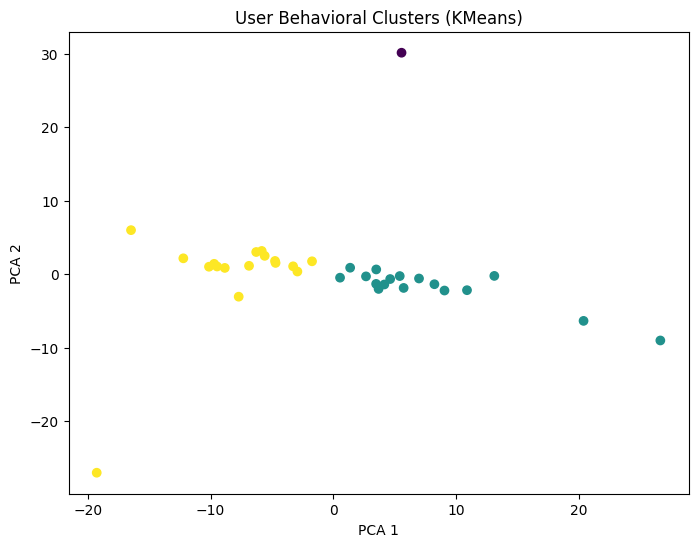

In [70]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_kmeans)
plt.title("User Behavioral Clusters (KMeans)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

In [71]:
user_id = df['Id'].iloc[0]
user_df = df[df['Id'] == user_id][['ActivityDate', 'TotalSteps']]
user_df.columns = ['ds', 'y']

In [72]:
model = Prophet(daily_seasonality=False, weekly_seasonality=True)
model.fit(user_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.


In [73]:
future = model.make_future_dataframe(periods=14)
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
28,2016-04-22,6203.958012,3066.738349,9552.879694
29,2016-04-23,8037.137096,4983.740973,11252.956331
30,2016-04-24,5209.835048,2190.361094,8402.148728
31,2016-04-25,7198.539610,4119.575265,10341.289938
32,2016-04-26,3308.192752,-22.547963,6781.986559


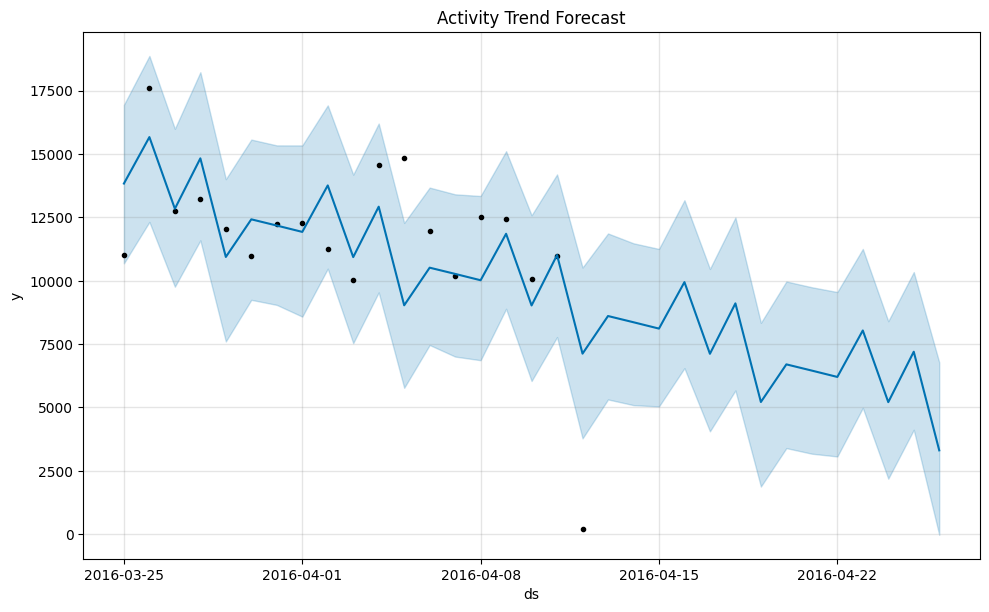

In [74]:
model.plot(forecast)
plt.title("Activity Trend Forecast")
plt.show()

In [75]:
merged = user_df.merge(forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], on='ds')

merged['anomaly'] = (
    (merged['y'] > merged['yhat_upper']) |
    (merged['y'] < merged['yhat_lower'])
)

merged.head()

,ds,y,yhat,yhat_upper,yhat_lower,anomaly
0,2016-03-25,11004,13832.773631,16937.787046,10685.315622,False
1,2016-03-26,17609,15665.952718,18866.853108,12319.936856,False
2,2016-03-27,12736,12838.650674,15992.356775,9763.542321,False
3,2016-03-28,13231,14827.355237,18225.602599,11591.904749,False
4,2016-03-29,12041,10937.008381,14006.400485,7602.827203,False


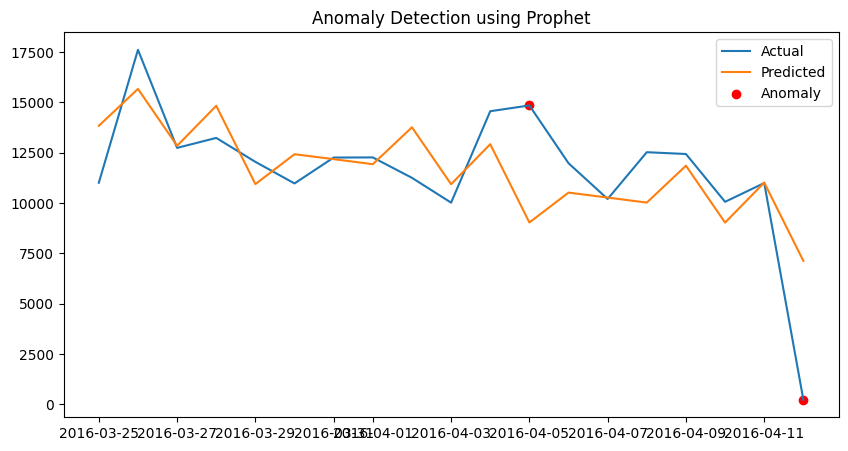

In [76]:
plt.figure(figsize=(10,5))
plt.plot(merged['ds'], merged['y'], label='Actual')
plt.plot(merged['ds'], merged['yhat'], label='Predicted')

plt.scatter(
    merged[merged['anomaly']]['ds'],
    merged[merged['anomaly']]['y'],
    color='red',
    label='Anomaly'
)

plt.legend()
plt.title("Anomaly Detection using Prophet")
plt.show()